In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Customer_Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Changing blank values of TotalCharges to 0 and converting its type from object to float

In [5]:
df['TotalCharges']=df['TotalCharges'].replace(" ","0")
df['TotalCharges']=df['TotalCharges'].astype(float)

In [6]:
#checking for type change 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# lets check for null values in our data

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# lets check for duplicate values

In [11]:
#check duplicate values based on unique column as well as whole row
df['customerID'].duplicated().sum()

0

# convert data of column values of [SeniorCitizen] 0,1-->'No','Yes'

In [13]:
def convert(values):
    if values==0:
        return 'No'
    else:
        return 'Yes'
df['SeniorCitizen']=df['SeniorCitizen'].apply(convert)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# lets create a piechart showing percentage of churn values

C:\Users\91914\AppData\Local\Temp\ipykernel_8396\2629191374.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yes=df.loc[df['Churn']=='Yes'].count()[0]
C:\Users\91914\AppData\Local\Temp\ipykernel_8396\2629191374.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  no=df.loc[df['Churn']=='No'].count()[0]


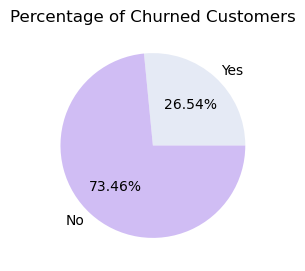

In [71]:
plt.figure(figsize=(3,3))
yes=df.loc[df['Churn']=='Yes'].count()[0]
no=df.loc[df['Churn']=='No'].count()[0]
labels=['Yes','No']
color=['#e5eaf5','#d0bdf4']
plt.pie([yes,no],labels=labels,colors=color,autopct='%.2f%%')
plt.title('Percentage of Churned Customers')
plt.show()

In [28]:
import seaborn as sns

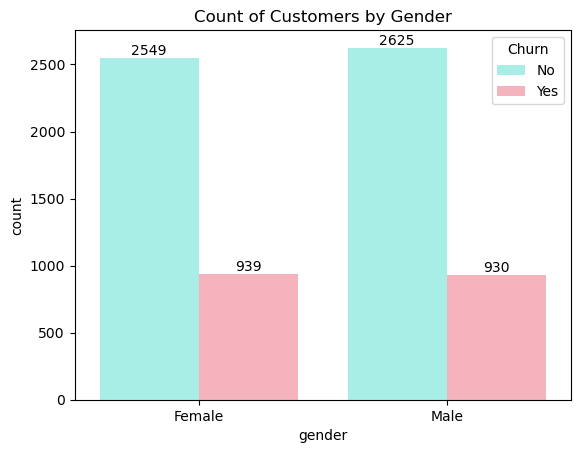

In [83]:
a=sns.countplot(x="gender",data=df,hue=df['Churn'],palette={'No': '#9df9ef', 'Yes': '#ffa8B6'})
a.bar_label(a.containers[0])
a.bar_label(a.containers[1])
a.set_title("Count of Customers by Gender")
plt.show()
#from below plot we can  say that churn is independent on gender

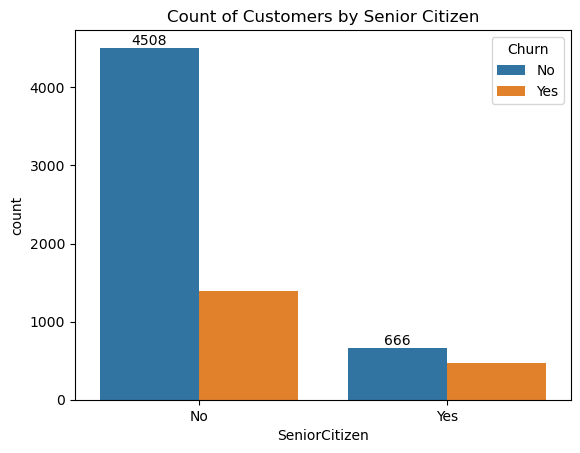

In [84]:
b=sns.countplot(x="SeniorCitizen",data=df,hue=df['Churn'])
b.set_title("Count of Customers by Senior Citizen")
b.bar_label(b.containers[0])
plt.show()

# using a chatgpt code to create a stacked bar plot f

<Figure size 200x200 with 0 Axes>

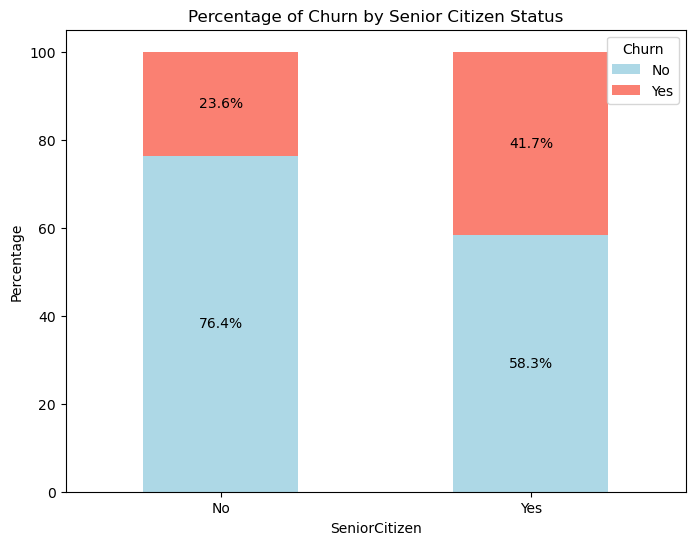

In [45]:
plt.figure(figsize=(2,2))
# Calculate the count of each combination of 'SeniorCitizen' and 'Churn'
count_data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Normalize the counts to get percentages
percent_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
ax = percent_data.plot(kind='bar', stacked=True, figsize=(8, 6), color=["lightblue", "salmon"])

# Add percentage labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_y() + height / 2.),
                    ha='center', va='center', fontsize=10, color='black')

# Labeling
ax.set_ylabel("Percentage")
ax.set_title("Percentage of Churn by Senior Citizen Status")
plt.xticks(rotation=0)  # Optional: Rotate x-axis labels if needed
plt.legend(title="Churn", loc='upper right')
plt.show()

In [ ]:
# In above plot we can see that comparitively larger no of Senior Citizen has churned out

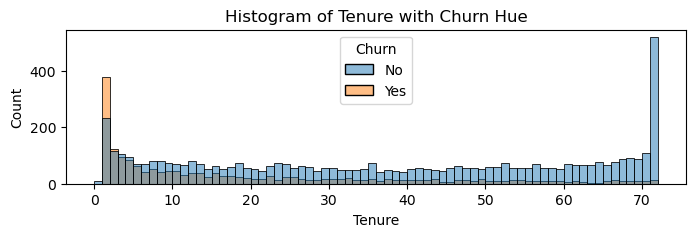

In [51]:
plt.figure(figsize=(8,2))
sns.histplot(data=df, x='tenure', bins=72, hue='Churn', kde=False)

# Labeling the plot
plt.title('Histogram of Tenure with Churn Hue')
plt.xlabel('Tenure')
plt.ylabel('Count')

# Show the plot
plt.show()
# so below we can see that more people churned out at the initial phase of tenure and those who stayed after 
# stayed for a long time.

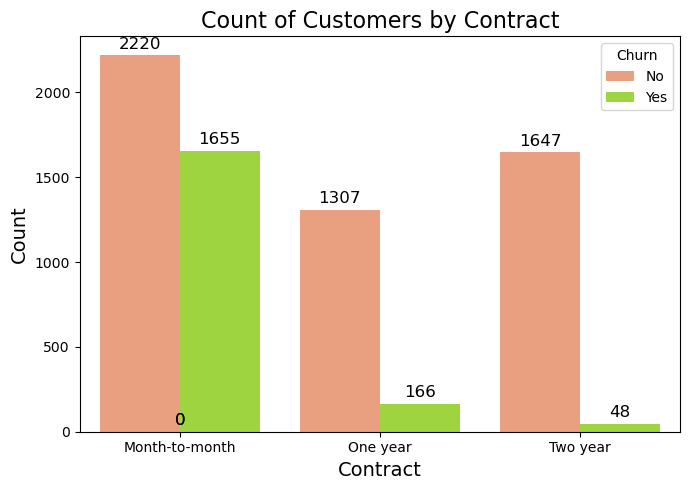

In [66]:

# Create the countplot with custom colors
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=df, x='Contract', hue='Churn', palette={'No': '#F9996F', 'Yes': '#A4ED27'})

# Add data labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 8), textcoords='offset points')

# Set plot labels and title
plt.title('Count of Customers by Contract', fontsize=16)
plt.xlabel('Contract', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
#people who have month-to-month contract is likely to churn 

In [58]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

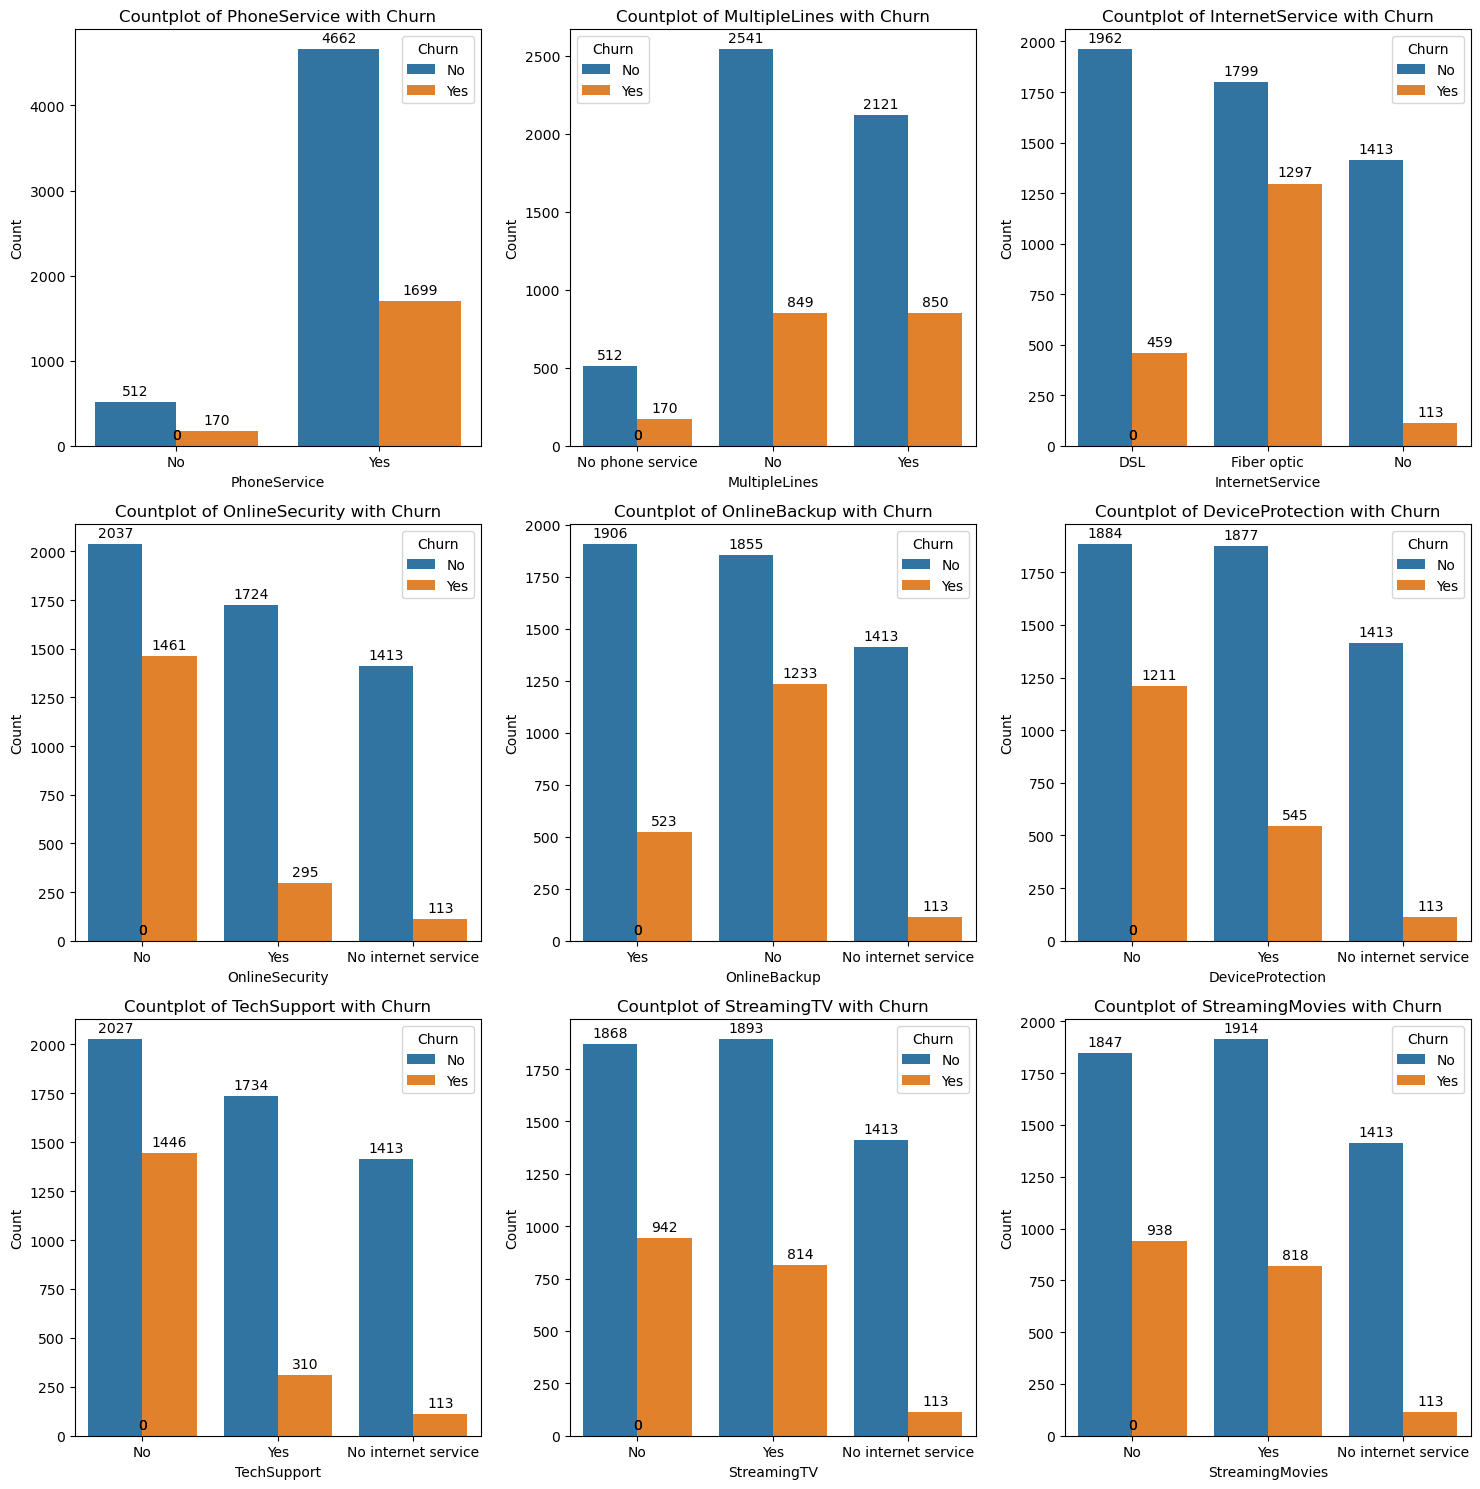

In [59]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the figure with subplots (3 rows, 3 columns, for 9 plots)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easy iteration

# Loop through each column and create the countplot
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[i])

    # Set the title and labels for each subplot
    axes[i].set_title(f'Countplot of {col} with Churn', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)

    # Add data labels to each bar
    for p in axes[i].patches:
        axes[i].annotate(format(p.get_height(), '.0f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', 
                         fontsize=10, color='black', 
                         xytext=(0, 8), textcoords='offset points')

# Adjust the layout so everything fits nicely
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Customers without internet-based services (like online security, backup, and tech support) tend to churn more. Fiber optic users have higher 
# churn compared to DSL users. Overall, lack of value-added services appears to correlate with increased churn rates.

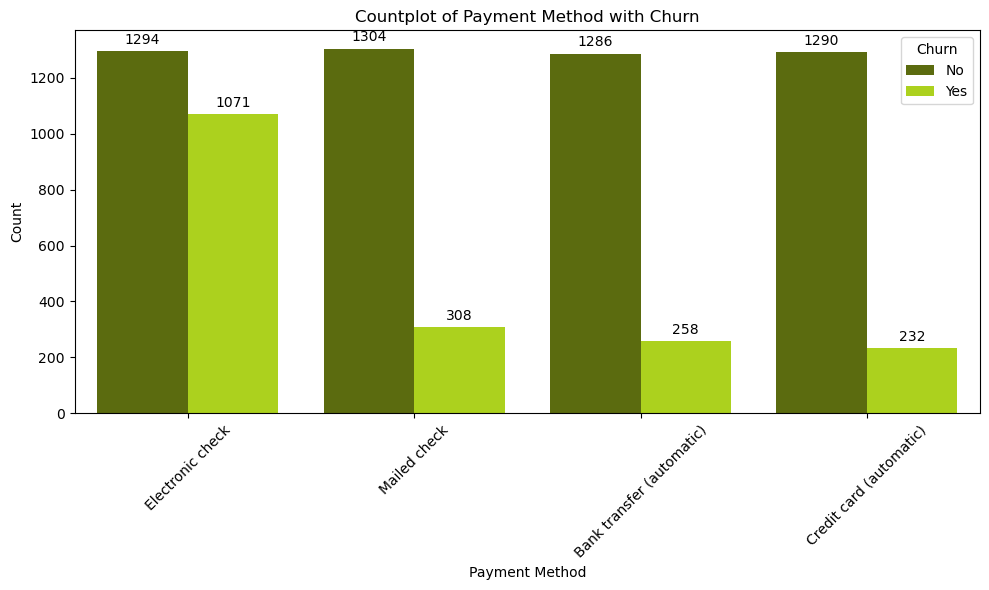

In [75]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='PaymentMethod', hue='Churn',palette={'No': '#657a00', 'Yes': '#beef00'})

# Add labels and title
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Countplot of Payment Method with Churn')
plt.xticks(rotation=45)
plt.legend(title='Churn')

# Add value labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

In [ ]:
# The countplot shows that customers using Electronic Check have the highest churn rate, with a relatively balanced count between churned and 
# non-churned customers. In contrast, Mailed Check, Bank Transfer (automatic), and Credit Card (automatic) users show significantly lower churn rates. 
# This suggests that automatic payment methods are associated with better customer retention.